# Loading and exploring spring parking brake data

## Systembeschreibung

Das zu betrachtende System ist ein Federspeicherbremszylinder, also ein Bremszylinder, der ohne angelegten Luftdruck die Bremse anlegt. Abhängig von der Federspeicherkraft kann das Fahrzeug (bspw. eine Lokomotive mit vier Federspeichern pro Fahrzeug) im Gefälle stationär gehalten werden oder nicht.

Die 24 Federn pro Zylinder verhalten sich näherungsweise linear, weisen jedoch eine recht große Streuung der Federrate auf. Sie sind zusammen mit einigen geometrischen Größen für die Kraft verantwortlich:

- Force/N: gemessene Kraft des Federspeichers
- Deviation $d$/mm: Abweichung der Dicke des Kolben (Abweichung nach unten: weniger Kraft)
- Deviation $h_{1}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Deviation $h_{2}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Dev. $l$/mm: Abweichung der Länge der Kolbenstange (Abweichung nach unten: weniger Kraft)

Zusätzlich haben die Daten noch Datum und Zeit der Messung.

## Aufgabe

Nach dem Auftreten eines Fehlers im Feld (Fahrzeug bricht trotz angelegtem Federspeicher los, Mindestkraft von 18 kN unterschritten) bekommt ihr aus der Produktion eures Unternehmens die Messdaten aus einer Schicht.

Analysiert die Daten und beantwortet die Fragestellungen: 

- Handelt es sich um ein systematisches Problem?
- Wie viele Einheiten sind betroffen?
- Lässt sich das Problem auf einzelne Maße eingrenzen?

In [1]:
# OS to use file system
import os
# Matplotlib and the pyplot module for a Matlab-like plot syntax
import matplotlib
# This is the syntax to import as a named module
import matplotlib.pyplot as plt
import matplotlib.dates
from matplotlib.dates import DateFormatter
# Pandas is a module for rectangular data "dataframe"
import pandas as pd
# Special module for a very quick analysis
from pandas.plotting import scatter_matrix
# Plot the graphs in the notebook
%matplotlib inline
# More plot styles
import seaborn as sns
# Clickable d3.js-Plots
import plotly.offline as po
import plotly.graph_objs as go 
import numpy as np

## Data import

In [2]:
# Import the csv-data to pandas dataframe (canonical name df)
df = pd.read_csv(os.path.join("SpringPBData.csv"))
# Display the first lines of the df
df.head()

,Time,F,d,h1,h2,l
0,2022-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860
1,2022-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965
2,2022-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146
3,2022-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969
4,2022-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235


In [3]:
# Transform first column from string to datetimeindex
df.set_index(pd.to_datetime(df['Time']), inplace = True)

#create a new culumn with only the 'Uhrzeit'
df['Time'] = pd.to_datetime(df['Time'])
df['Uhrzeit'] = df['Time'].dt.strftime('%H:%M:%S')

# Delete second ocurrence of time
df.drop("Time", axis = 1, inplace = True)
df.head()

,F,d,h1,h2,l,Uhrzeit
Time,,,,,,
2022-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860,07:30:00
2022-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965,07:32:00
2022-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146,07:34:00
2022-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969,07:36:00
2022-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235,07:38:00


---

# Euer Bericht "Mangelnde Federspeicherkraft an Lokomotive ABC-123 während Federspeicherprüfung"

# Fragestellung

Es soll der Datensatz zu einer Federspeicherbremse der Lokomotive ABC-123 untersucht werden, welche im Betrieb auf Grund von starken Schwankungen der Haltekraft F ausgefallen ist.

Hier wurde festgestellt, dass ein Unterschreiten der Mindesthaltekraft von 18 kN mit Fertigungsungenauigkeiten der Feder sowie des Kolbens zusammenhängt.

Es soll nun untersucht werden ob der gegebene Datensatz Informationen darüber enthält ob der Fehler systematisch auftritt und ob das Problem auf einzelne Maße reduziert werden kann.

Die dazu verfügbaren Daten bestehen aus Abweichungen zu Sollwerten von

**Dicke des Kolbens "d"**

**Lage der Bohrung des Hammerheads "h_1" & "h_2"**  

**Länge der Kolbenstange "l"**

# Analyse

Zunächst werden die Werte in Abhängigkeit von F sortiert.
Anschließend wird die Anzahl aller Werte gezählt, sowie die Anzahl Fehlerhafter Einheiten mit F<=18000N ermittelt und ausgegeben.

In [4]:
df[df['F'] <= 18000]['F'].head(5) #sortieren der Ausschusswerte und testweises Anzeigen der ersten 5 Fehler

Time
2022-10-26 07:42:00    15969.394445
2022-10-26 08:38:00    17695.840912
2022-10-26 08:40:00    16968.687761
2022-10-26 08:42:00    17442.243443
2022-10-26 08:44:00    15682.401992
Name: F, dtype: float64

In [5]:
df[df['F'] >=0]['F'].count()

300

In [6]:
df[df['F'] <= 18000]['F'].count() # Zählfunktion der Werte unter 18 kN

42

Der Datensatz umfasst insgesamt 300 Werte.
42 Einheiten sind Fehlerhaft.

Im Anschluss werden die Werte von F über der Zeit dargestellt um eine zeitliche Abhängigkeit zu ermitteln.
Dies wird sowohl für alle Daten uns als auch nur für alle F<=18000N ausgeführt.

<Axes: xlabel='Time'>

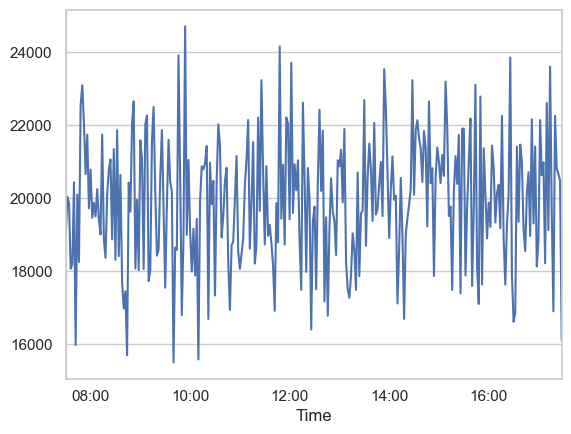

In [7]:
sns.set(style="whitegrid")
df['F'].plot()

<Axes: xlabel='Time'>

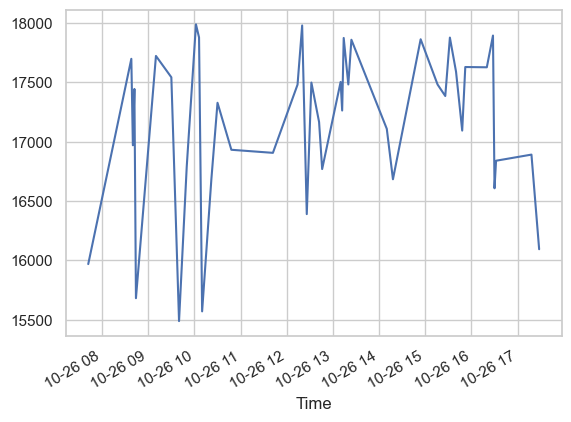

In [8]:
sns.set(style="whitegrid")
df[df['F']<=18000]['F'].plot()

Es ist eine starke Schwankung der Werte von F zwischen 15500 N und über 24000 N festzustellen. Diese Schwankungen scheinen jedoch willkürlich aufzutreten und keinem bestimmten Ereignis zu folgen. Eine zeitliche Abhängigkeit der Fehlerhaften Einheiten kann demnach nicht festegestellt werden.

Im nächsten Schritt werden alle Daten in einem Scatterplot dargestellt um eventuelle Abhängigkeiten untereinander festzustellen.

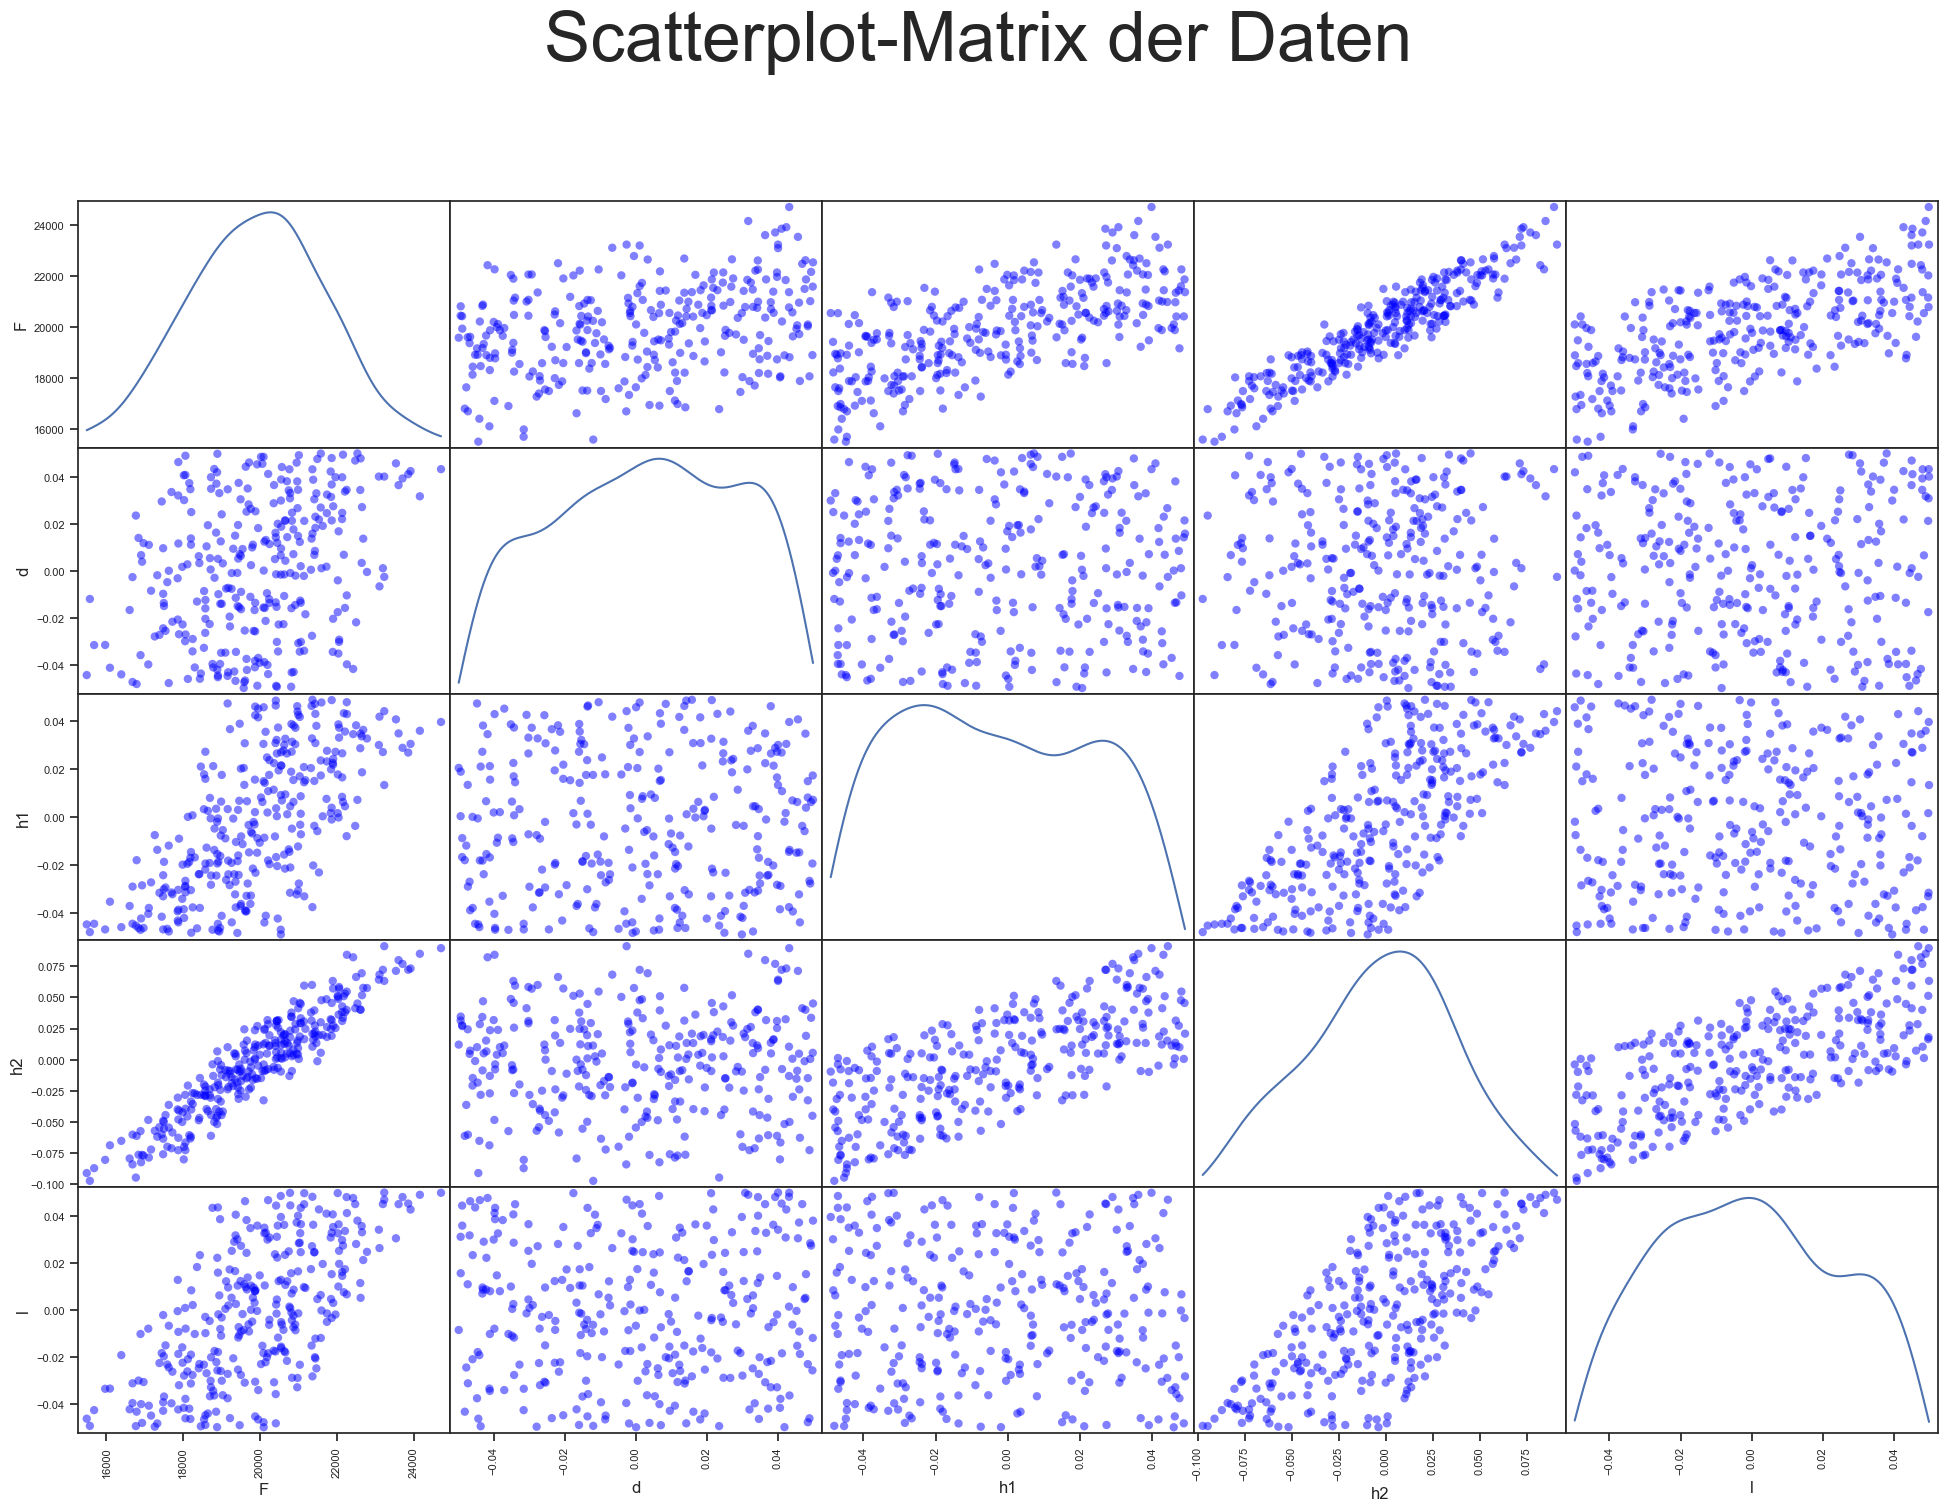

In [9]:
# Seaborn-Stil anwenden
sns.set(style="ticks")

# Scatterplot-Matrix erstellen
m = scatter_matrix(df, figsize=(24, 16), marker='o', diagonal='kde', c='blue')
plt.suptitle('Scatterplot-Matrix der Daten', y=1, size=50)
plt.show()

Es ist klar erkennbar, dass einige Werte stärker miteinander korrelieren als andere. Insbesondere die Abhängigkeit von F gegenüber h2 fällt hier auf. Auch h1 und l weisen korrelationen mit h2 und F auf. d scheint keinen besonderen Einfluss auf die Kraft F zu haben. Ein weiterer Hinweis auf die Abhängigkeit von F und h2 könnte die sehr ähnlich aussehende Dichteverteilung der Werte sein.

Um die Auswirkung von kombinierten Abweichungen auf die Kraft F zu analysieren, werden die Daten in Pairplots dargestellt. Hier wird F farblich dargestellt, sodass Werte F<=18000 in rot und F>18000 in blau angezeigt werden. 

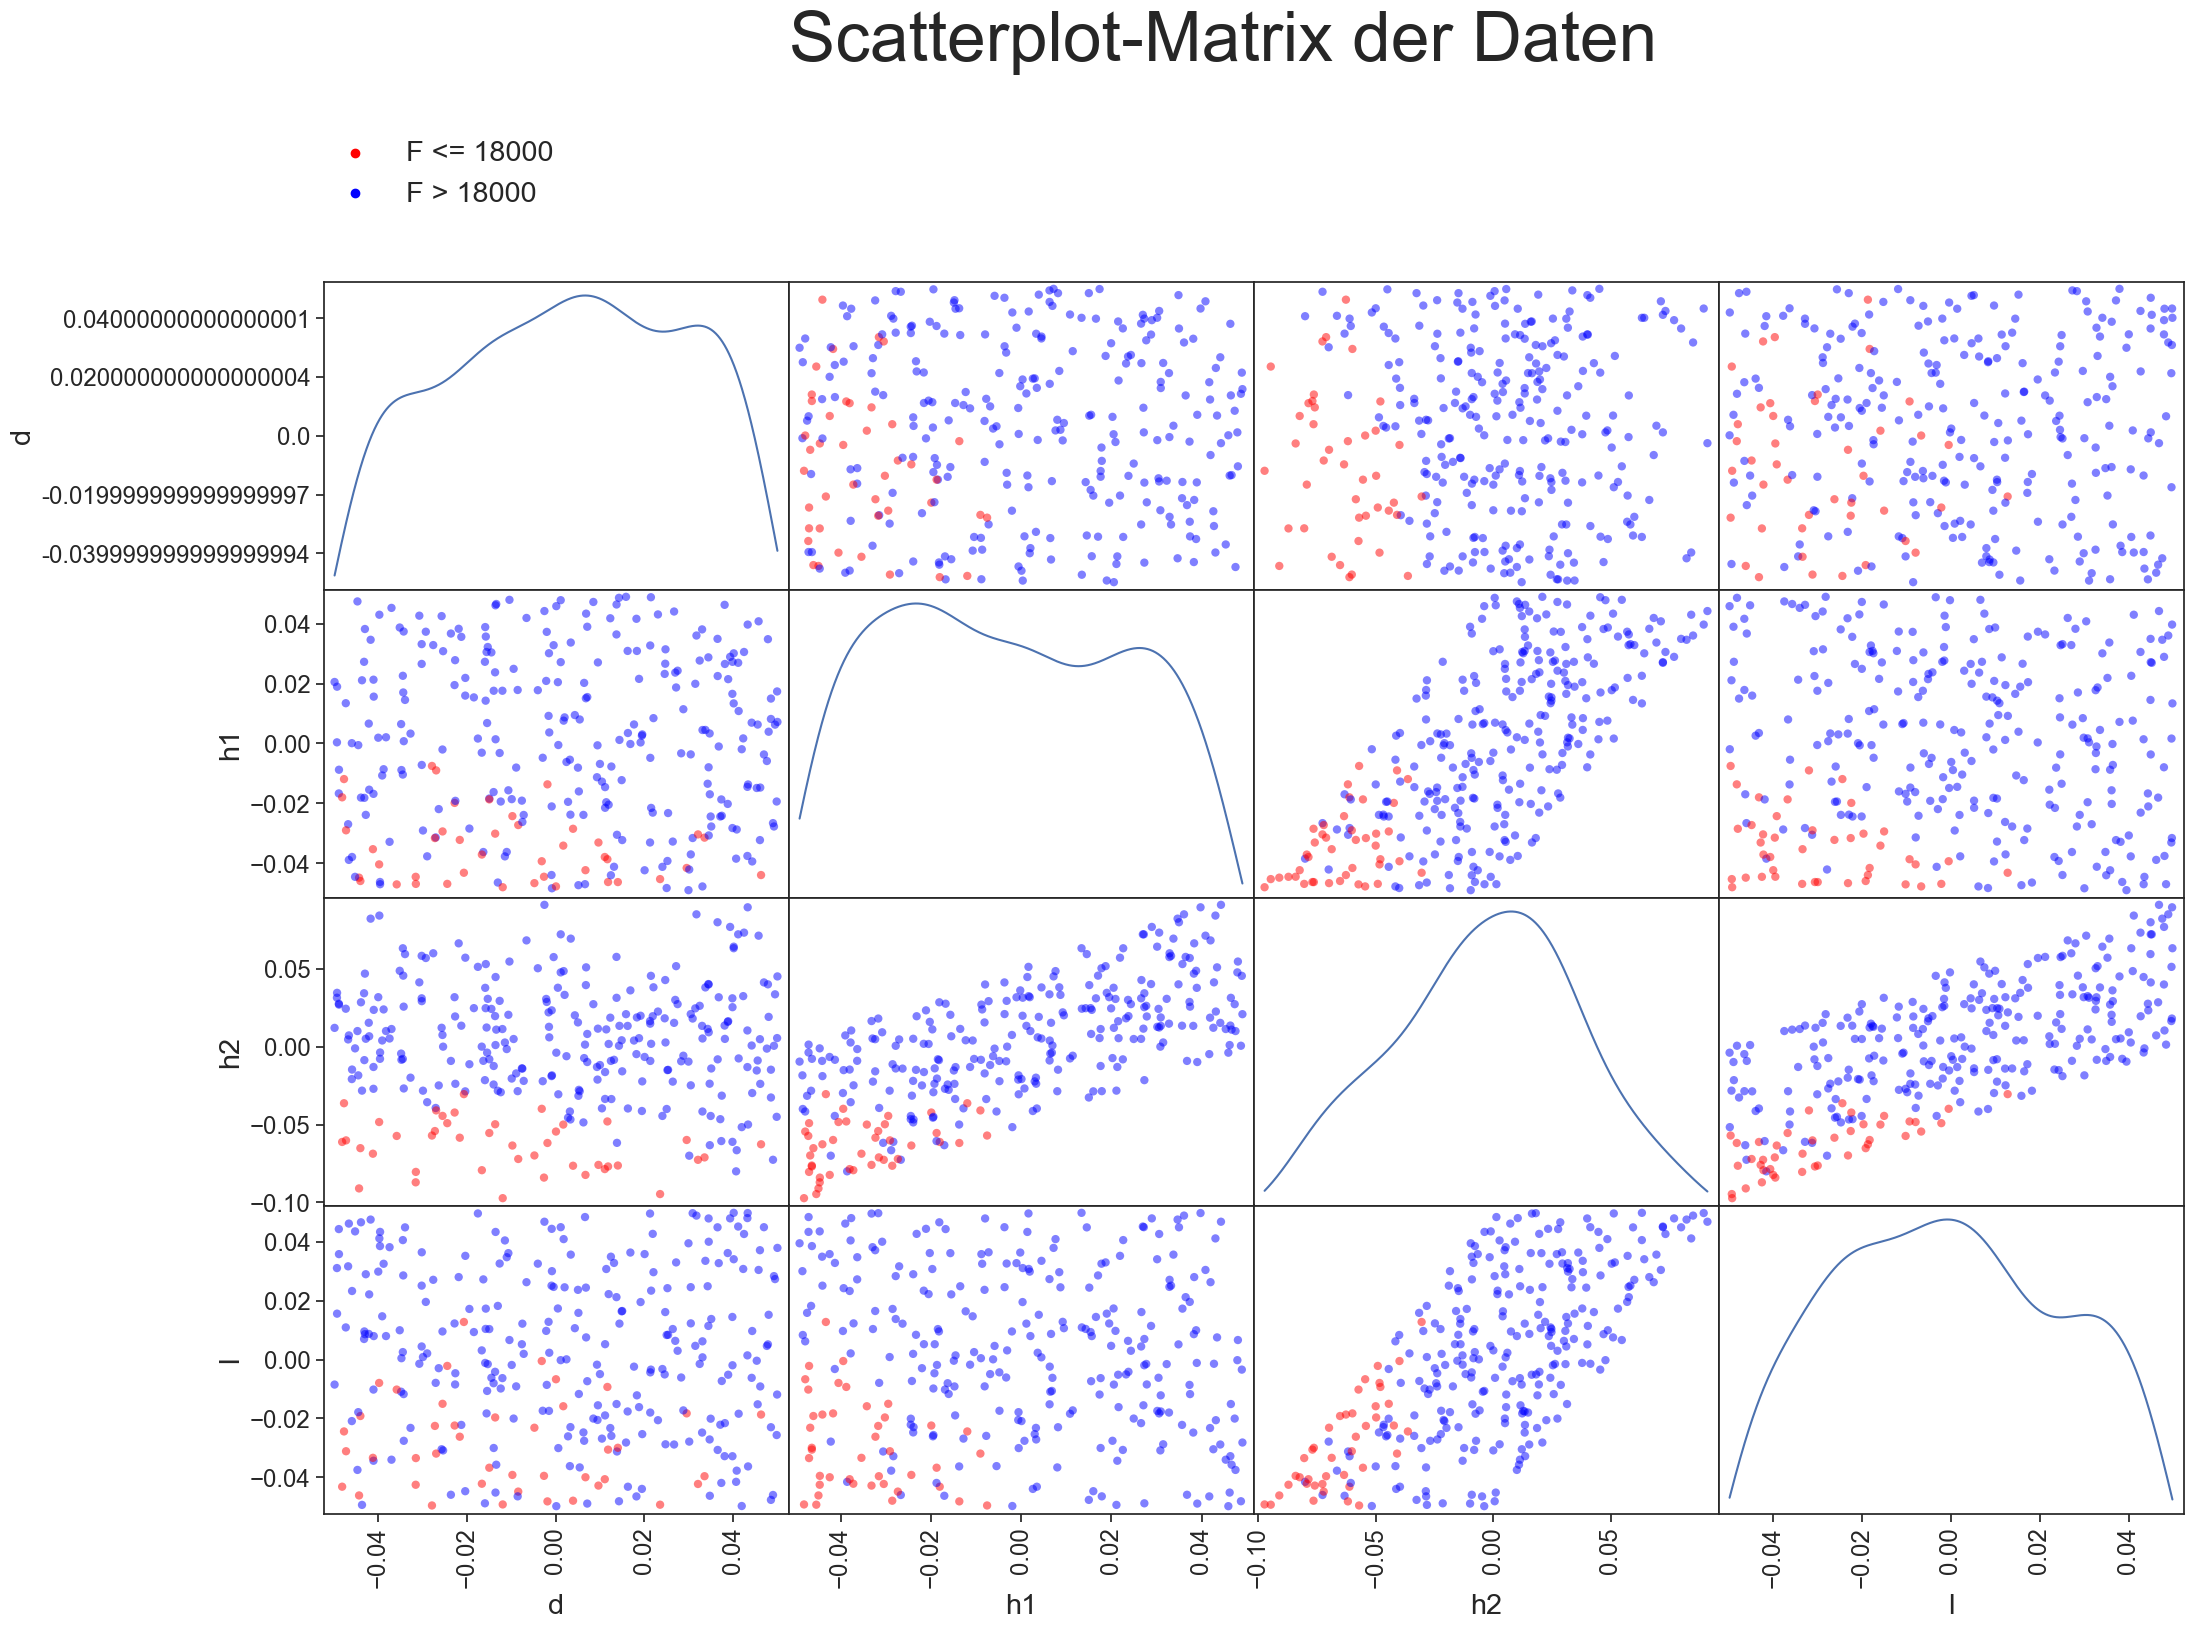

In [10]:
# Seaborn-Stil anwenden
sns.set(style="ticks")

# Farben definieren
colors = df['F'].apply(lambda x: 'red' if x <= 18000 else 'blue')

# Scatterplot-Matrix erstellen (ohne die 'F'-Spalte)
m = scatter_matrix(df.drop('F', axis=1), figsize=(24, 16), marker='o', diagonal='kde', c=colors)

# Füge eine Legende hinzu
legend_labels = {'red': 'F <= 18000', 'blue': 'F > 18000'}
for color, label in legend_labels.items():
    plt.scatter([], [], c=color, label=label)

# Zeige die Legende oben in der Mitte an
plt.legend(frameon=False, fontsize='xx-large', bbox_to_anchor=(-2.75, 4.35), loc='center')

# Setze den Titel und vergrößere ihn
plt.suptitle('Scatterplot-Matrix der Daten', y=1.05, size=50)

# Vergrößere die Achsentitel
for ax in m.flatten():
    ax.title.set_fontsize('xx-large')

# Vergrößere die Achsenbeschriftungen
for ax in m.flatten():
    ax.xaxis.label.set_fontsize('xx-large')
    ax.yaxis.label.set_fontsize('xx-large')

# Vergrößere die Ziffern auf den Achsen
for ax in m.flatten():
    ax.tick_params(axis='both', which='major', labelsize='x-large')

# Zeige den Plot an
plt.show()

Hier ist erkennbar, dass die roten und blauen Datenpunkte bei einigen Plots sehr durchmischt sind, wie bsplw. bei d zu l, bei anderen jedoch eine relativ klare Trennung aufweisen. Auch hier sticht h2 hervor, da nahezu unabhängig von der zweiten Abweichung alle Werte h2 <= -0,5 rote Punkte und damit Kräfte F <= 18000 N aufweisen. Bei allen anderen Werten ist Trennung weniger klar.

Desweiteren wollen wir uns im folgenden Pairplot die absoluten Abweichungen der verschiedenen Werte anschauen.
Zur besseren Visualisierung werden gleiche Skalierungen der x-Achse gewählt. 

C:\Users\LSchn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



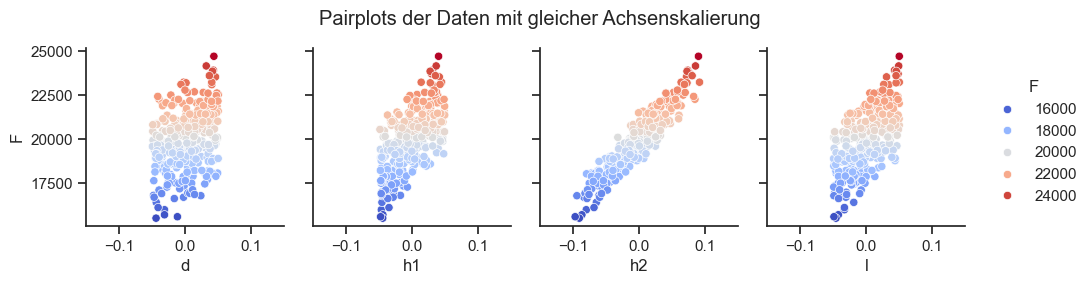

In [12]:
# Setze die x-Achsenlimits
xlim = (-0.15, 0.15)

# Erstelle das pairplot
g = sns.pairplot(df, hue='F', palette='coolwarm', x_vars=['d', 'h1','h2', 'l'], y_vars = 'F', 
                 diag_kind='kde', markers=None, height=2.5, aspect=1, corner=False,
                 dropna=False)

# Setze die x-Achsenlimits für alle Subplots
for ax in g.axes.flat:
    ax.set_xlim(xlim)

# Setze den Titel
plt.suptitle('Pairplots der Daten mit gleicher Achsenskalierung', y=1.1)

# Zeige den Plot an
plt.show()

Es fällt auf, dass die Werte von d, l und h1 alle in einem Intervall von -0,05 bis 0,05 liegen, wohingegen h2 doppelt so hohe Abweichungen von -0,1 bis 0,1 aufweißt. 
h1 und h2 stellen beide Abweichungen der Bohrungslage dar. Die deutlich höheren Abweichungen bei h2 könnten auf ein defektes Werkzeug oder eine schlecht kalibrierte Maschine hindeuten.

C:\Users\LSchn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 1000x800 with 0 Axes>

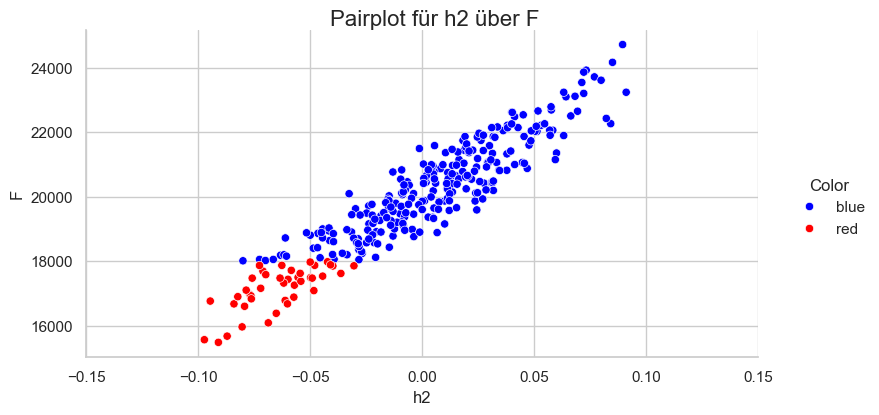

In [16]:
# Setze die x-Achsenlimits
xlim = (-0.15, 0.15)

# Erstelle das pairplot nur für h2 über F mit größerer Abbildung und schönem Stil
sns.set(style="whitegrid", palette=['red', 'blue'])

# Füge eine Spalte "Color" basierend auf dem Wert von F hinzu
df['Color'] = df['F'].apply(lambda x: 'red' if x < 18000 else 'blue')

plt.figure(figsize=(10, 8))

g = sns.pairplot(df, palette=df['Color'].unique().tolist(), x_vars=['h2'], y_vars='F', hue='Color',
                 diag_kind='kde', markers=None, height=4, aspect=2, dropna=False)

# Setze die x-Achsenlimits für alle Subplots
for ax in g.axes.flat:
    ax.set_xlim(xlim)

# Setze die x-Achsenlimits für die Hauptdiagonalen
for i in range(len(g.axes)):
    g.axes[i, i].set_xlim(xlim)

# Setze den Titel
plt.suptitle('Pairplot für h2 über F', y=1.02, fontsize=16)

# Zeige den Plot an
plt.show()


In [23]:
count_filtered_data = df[(df['F'] < 18000) & (df['h2'] < -0.05)].shape[0]

print(f"Anzahl der Datenpunkte mit F < 18000 und h2 < -0,05: {count_filtered_data}")

Anzahl der Datenpunkte mit F < 18000 und h2 < -0,05: 32


Bei detaillierter Betrachtung können 32 der fehlerhaften Einheiten auf das Intervall -0,05 bis -0,1 eingeschränkt werden.
Das heißt 76% der fehlerhaften Werte haben Werte von h2 < -0,05.
Dennoch gibt es in diesem Bereich auch Einheiten die noch in Ordnung sind, weshalb h2 nicht als allein verantwortliches Maß identifiziert werden kann.

# Ergebnis

Zusammenfassend kann kein systematisches Problem oder eine eindeutige Eingrenzung auf ein Maß festgestellt werden. Es können jedoch signifikante Abhängigkeiten zwischen den F und den Abweichungen festgestellt werden. Insbesondere h2 scheint einen erhöhten Einfluss auf die Kraft F zu haben. 

Von Insgesamt 300 produzierten Einheiten waren am betrachteten Tag 42 Einheiten Fehlerhaft. Von diesen 42 Einheiten haben 32 (76%) Werte von h2 < -0,05. Hier sollte nachfolgend die Ursache der erhöhten Abweichung ermittlet und ggf. beseitigt werden. 


Festzuhalten ist, dass h2 das kritischste Maß ist, eine fehlerhafte Einheit jedoch immer auf ein Zusammenspiel von negativen Abweichungen von h1, h2 und l zurückzuführen ist. 